# Energy Consumption Prediction Using Regression Techniques
## Objective

This project focuses on predicting energy consumption in buildings based on various features such as square footage, number of occupants, appliances used, average temperature, and the day of the week. The goal is to build an accurate predictive model to optimize energy usage and efficiency.

<img src="image/A-closer-look-at-Energy-Demand-in-the-UK-Featured-image.webp" alt="Energy consumption" width="600"/>

### 1️⃣ Data Preprocessing - [Energy Comsumption Data](https://www.kaggle.com/datasets/govindaramsriram/energy-consumption-dataset-linear-regression/data)
✔ Load dataset  
✔ Handle missing values (if any)  
✔ Exploratory Data Analysis (EDA)  
✔ One-Hot Encoding for categorical variables  
✔ Feature Engineering  
✔ Normalize numerical features using **StandardScaler**  

### 2️⃣ Model Building

✔ Multiple regression models were trained and evaluated:
 - Linear Regression
 - Ridge Regression (L2 Regularization)
 - Lasso Regression (L1 Regularization)

### 3️⃣ 📊 Model Evaluation Metrics:

- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R² Score**
- **Cross-Validation**



# IMPORTING LIBRARIES

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.simplefilter('ignore')

## Load Data

In [147]:
# Load the train and test Data
train_data = pd.read_csv("Dataset/train_energy_data.csv")
test_data = pd.read_csv("Dataset/test_energy_data.csv")

In [109]:
# View the first few rows and columns of the train set
train_data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [110]:
# View the first few rows and columns of the test set
test_data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [111]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Square Footage,1000.0,25462.38800,14294.554000,560.00,13169.7500,25477.000,37446.25,49997.00
Number of Occupants,1000.0,48.37200,29.061972,1.00,22.0000,47.000,73.25,99.00
Appliances Used,1000.0,25.60600,14.105166,1.00,13.0000,26.000,38.00,49.00
Average Temperature,1000.0,22.61139,7.139943,10.05,16.4750,22.815,28.85,34.99
Energy Consumption,1000.0,4166.25257,933.313064,1683.95,3509.4825,4175.730,4863.85,6530.60


In [112]:
# Checking the size of the train and test data
print("Shape of the train Dataset:")
print(train_data.shape)
print("\nShape of the test Dataset:")
print(test_data.shape)

Shape of the train Dataset:
(1000, 7)

Shape of the test Dataset:
(100, 7)


In [113]:
# Dataset Information
print("Train Dataset Info:")
print(train_data.info())
print("\nTest Dataset Info:")
print(test_data.info())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-

# Data Cleaning

In [114]:
# Check for missing Values
print("\nMissing Values in Train Dataset:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Dataset:")
print(test_data.isnull().sum())


Missing Values in Train Dataset:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

Missing Values in Test Dataset:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64


In [116]:
# Checking for duplicate values
print("Duplicate Values in Train Dataset:")
print(train_data.duplicated().sum())
print("\nDuplicate Values in Train Dataset:")
print(test_data.duplicated().sum())

Duplicate Values in Train Dataset:
0

Duplicate Values in Train Dataset:
0


# EDA

**Distribution of Numerical Features**

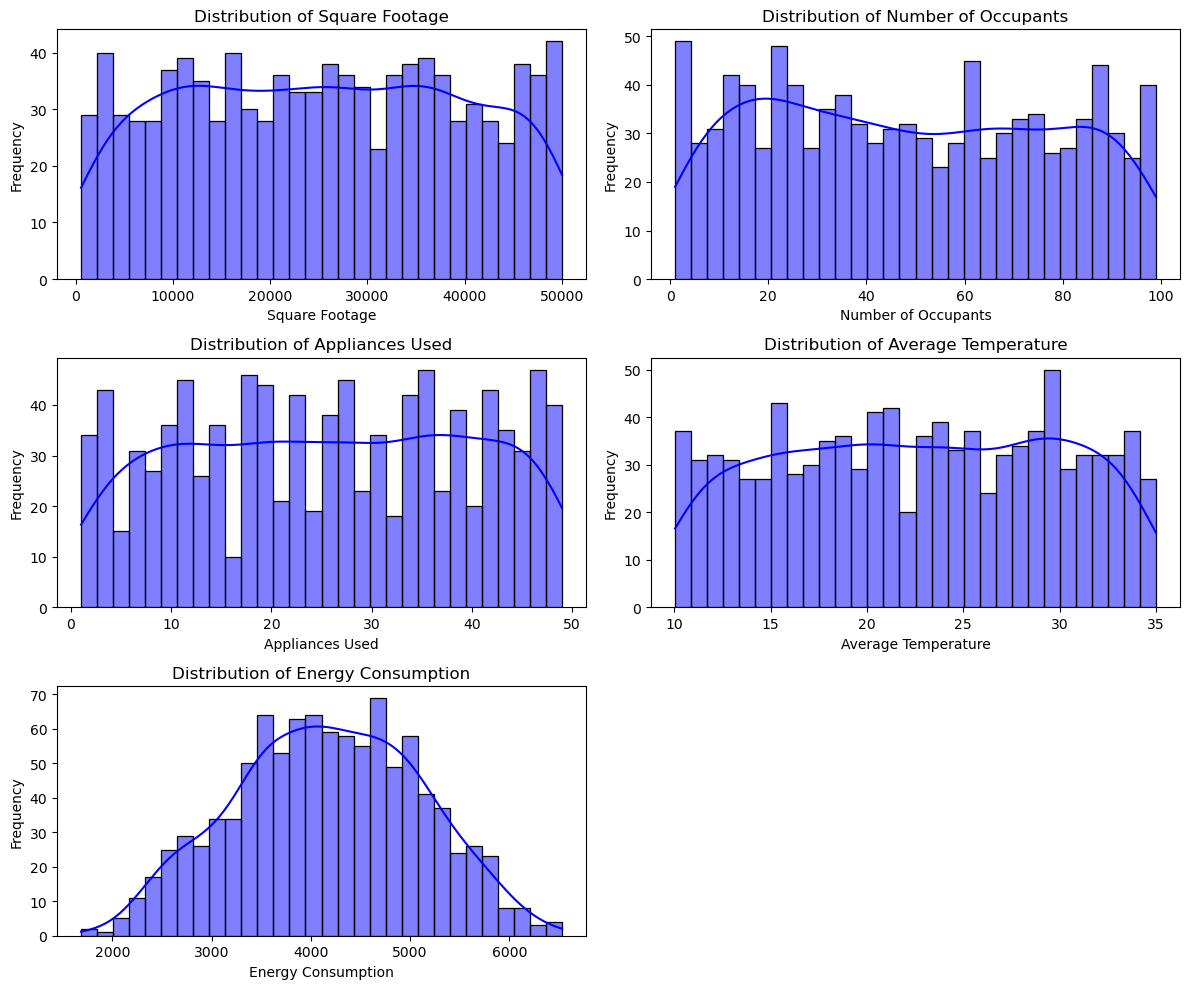

In [117]:
# Distribution of Numerical Features
plt.figure(figsize=(12, 10))
for i, column in enumerate(['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Energy Consumption'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(train_data[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Boxplot**

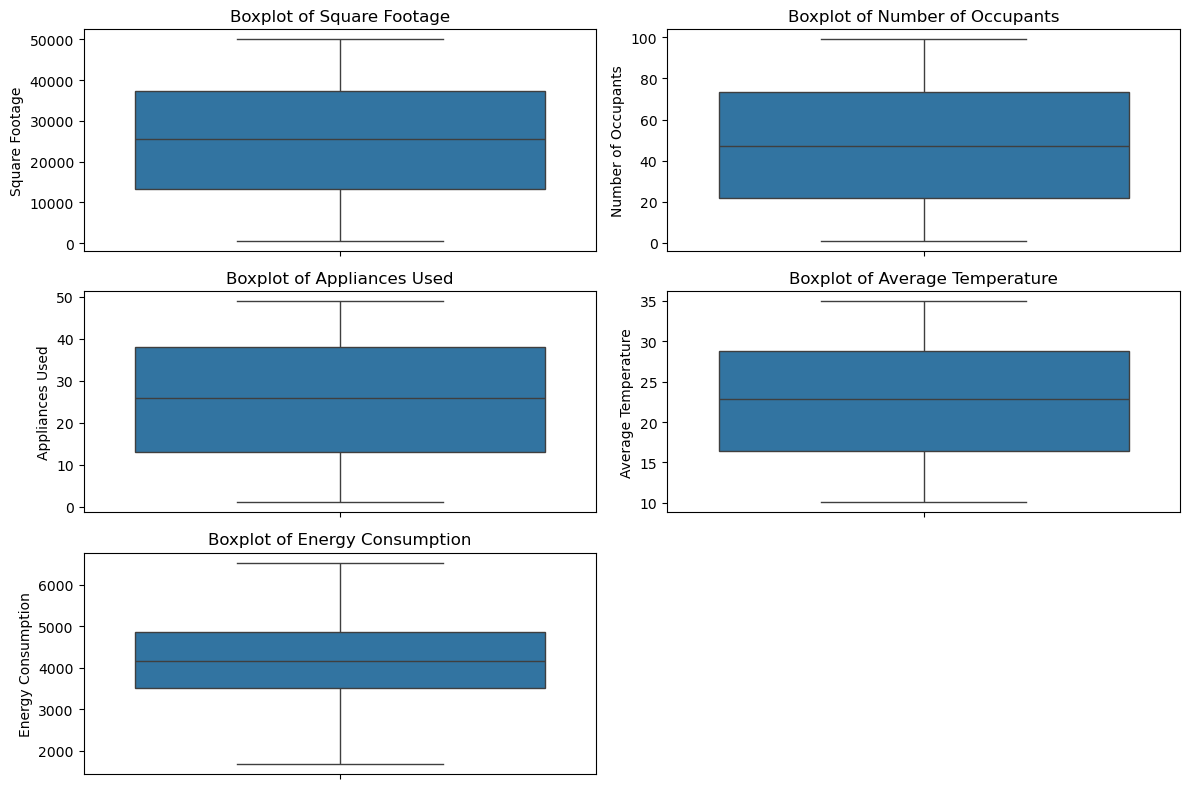

In [118]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12, 8))
for i, column in enumerate(['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Energy Consumption'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=train_data, y=column)
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

**Valus Count of The Category Colunms**

In [119]:
train_data['Building Type'].value_counts()

Building Type
Residential    347
Commercial     336
Industrial     317
Name: count, dtype: int64

In [120]:
train_data['Day of Week'].value_counts()

Day of Week
Weekday    507
Weekend    493
Name: count, dtype: int64

**Average Energy Consumption by Building Type**

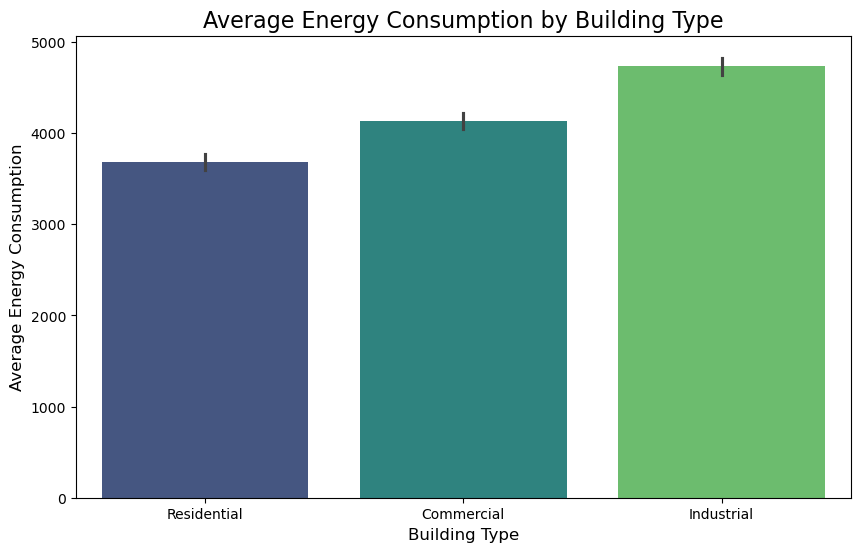

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='Building Type', y='Energy Consumption', palette='viridis')
plt.title('Average Energy Consumption by Building Type', fontsize=16)
plt.xlabel('Building Type', fontsize=12)
plt.ylabel('Average Energy Consumption', fontsize=12)
plt.show()

**Average Energy Consumption by Days of the week**

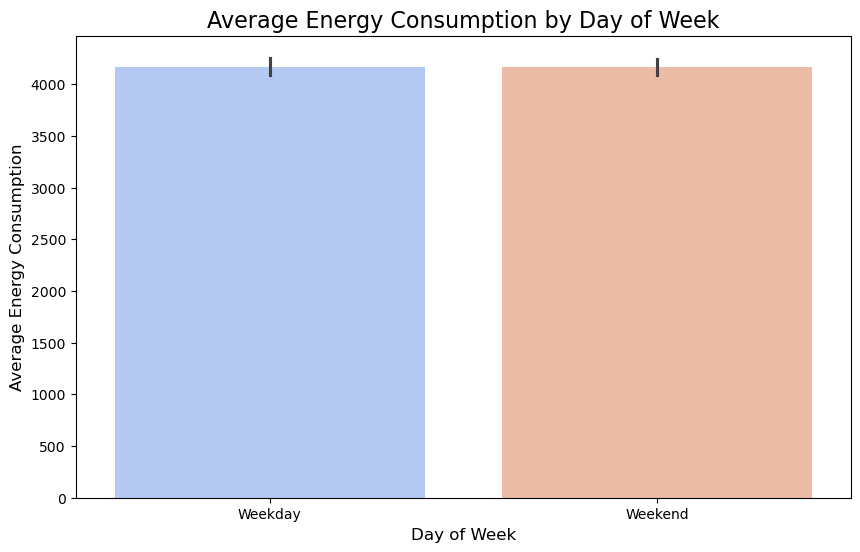

In [122]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x='Day of Week', y='Energy Consumption', palette='coolwarm')
plt.title('Average Energy Consumption by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Energy Consumption', fontsize=12)
plt.show()


**Day of Week:**
**Weekdays show slightly higher energy consumption compared to weekends, though the difference is not very pronounced.**

**Square Footage vs Energy Consumption**

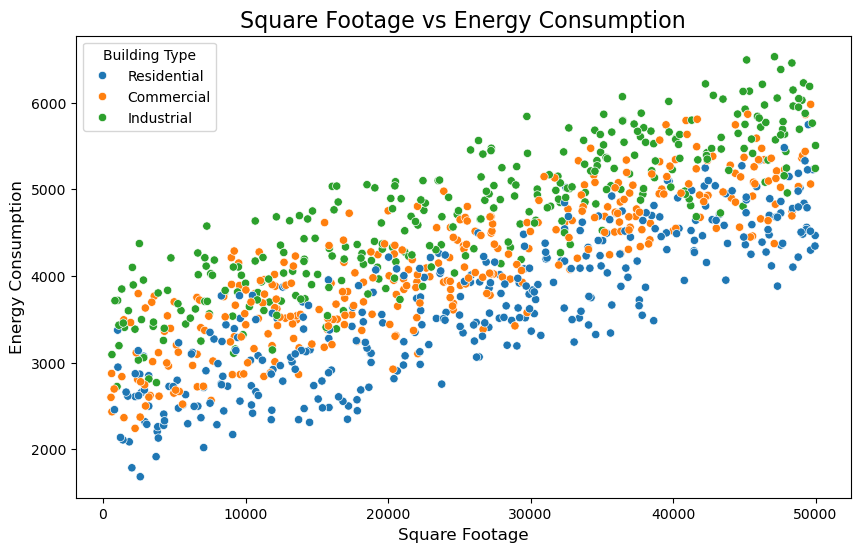

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Square Footage', y='Energy Consumption', hue='Building Type', palette='tab10')
plt.title('Square Footage vs Energy Consumption', fontsize=16)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Building Type')
plt.show()

#### Building Energy Consumption Trends

#### Residential Buildings:
- Show a wide range of energy consumption values for a given square footage.
- Factors other than size, such as **energy efficiency measures, appliances, and occupant behavior**, significantly influence energy use.

#### Commercial Buildings:
- Exhibit a spread in energy consumption, but the trend appears more linear compared to residential buildings.
- This suggests that **building size has a greater influence on energy consumption** in commercial settings.

#### Industrial Buildings:
- Generally have the **highest energy consumption** across all square footage ranges.
- This is likely due to the **energy-intensive nature of industrial processes and equipment**.



**Correlation Analysis**

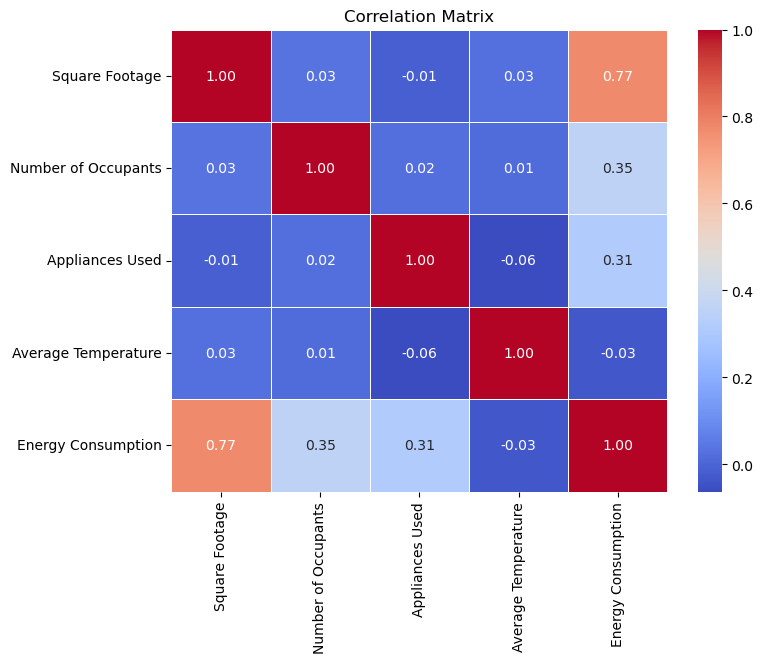

In [124]:
# Correlation Analysis
correlation_matrix = train_data[['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Energy Consumption']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### Correlation Heatmap Analysis

#### Strong Correlations:
- **Square Footage** and **Energy Consumption** show a strong positive correlation.

#### Moderate Correlations:
- **Number of Occupants** and **Energy Consumption** have a moderate correlation.
- **Average Temperature** and **Energy Consumption** also exhibit a moderate correlation.

#### Weak/No Correlation:
- **Average Temperature** has little to no correlation with other variables apart from its moderate link to Energy Consumption.

**Regression plot for Average Temperature vs Energy Consumption**

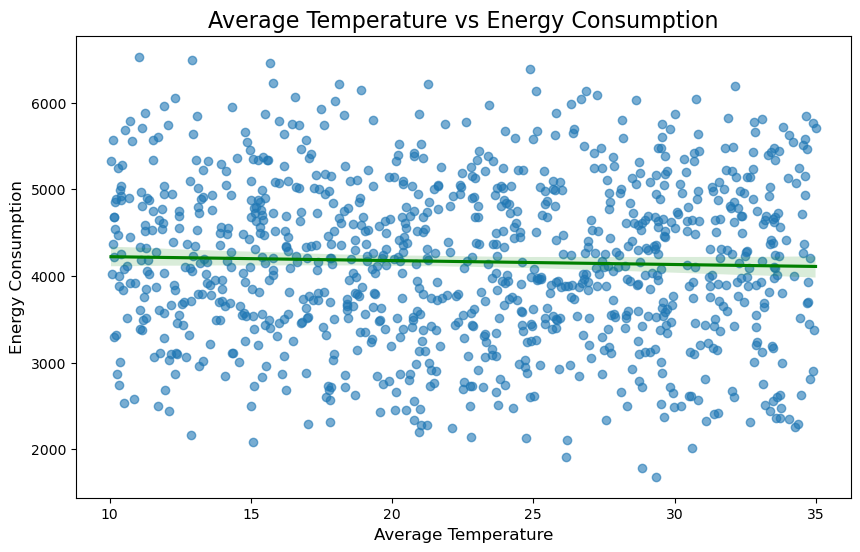

In [125]:
plt.figure(figsize=(10, 6))
sns.regplot(data=train_data, x='Average Temperature', y='Energy Consumption', scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
plt.title('Average Temperature vs Energy Consumption', fontsize=16)
plt.xlabel('Average Temperature', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.show()

# Encoding

In [126]:
# One-Hot Encoding
train_data = pd.get_dummies(train_data, columns=['Building Type', 'Day of Week'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Building Type', 'Day of Week'], drop_first=True)


# Feature Engineering

In [127]:
## Interaction Features
train_data['Square Footage x Occupants'] = train_data['Square Footage'] * train_data['Number of Occupants']
test_data['Square Footage x Occupants'] = test_data['Square Footage'] * test_data['Number of Occupants']

train_data['Appliances x Temp'] = train_data['Appliances Used'] * train_data['Average Temperature']
test_data['Appliances x Temp'] = test_data['Appliances Used'] * test_data['Average Temperature']

## Log Transformation
train_data['Log Square Footage'] = train_data['Square Footage'].apply(lambda x: np.log1p(x))
test_data['Log Square Footage'] = test_data['Square Footage'].apply(lambda x: np.log1p(x))

train_data['Log Energy Consumption'] = train_data['Energy Consumption'].apply(lambda x: np.log1p(x))
test_data['Log Energy Consumption'] = test_data['Energy Consumption'].apply(lambda x: np.log1p(x))


# Scaling 

In [128]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature',
                      'Square Footage x Occupants', 'Appliances x Temp']

train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
test_data[numerical_features] = scaler.transform(test_data[numerical_features])

In [24]:
train_data.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend,Square Footage x Occupants,Appliances x Temp,Log Square Footage,Log Energy Consumption
0,-1.287805,0.951134,-1.106957,1.012925,2713.95,False,True,False,-0.649000,-0.742878,8.862767,7.906529
1,1.323516,0.606869,1.375645,-0.825544,5744.99,False,False,False,1.541188,0.486846,10.700386,8.656257
2,-0.434466,-0.391498,-0.610436,-1.164652,4101.24,True,False,True,-0.488156,-0.892666,9.865578,8.319288
3,-0.853716,-1.183306,1.091919,1.430504,3009.14,False,True,False,-0.970489,2.093667,9.492960,8.009742
4,-0.846017,-0.770188,-0.539505,-1.498155,3279.17,False,False,False,-0.822106,-0.969970,9.501217,8.095651


In [129]:
# Model Preparation
X = train_data.drop(columns=['Energy Consumption', 'Log Energy Consumption'])
y = train_data['Energy Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

In [130]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  # L2 Regularization
    "Lasso Regression": Lasso(alpha=0.01)  # L1 Regularization
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"Mean Squared Error": mse, "Root Mean Squared Error": rmse, "R2 Score": r2}

# Display Results
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

# Save the best model (based on R2 Score)
best_model_name = results_df["R2 Score"].idxmax()
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Predictions on Test Dataset
y_test_pred = best_model.predict
test_data['Predicted Energy Consumption'] = y_test_pred


Model Performance:
                   Mean Squared Error  Root Mean Squared Error  R2 Score
Linear Regression            0.000188                 0.013728  1.000000
Ridge Regression            12.486473                 3.533620  0.999985
Lasso Regression             0.046544                 0.215741  1.000000
Best Model: Linear Regression


**Cross_Validation**

In [131]:
from sklearn.model_selection import learning_curve, cross_val_score
# Cross-validation for Linear Regression
print("\nCross-Validation for Linear Regression:")
cv_scores = cross_val_score(models["Linear Regression"], X_train, y_train, cv=5, scoring="r2")
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")


Cross-Validation for Linear Regression:
Cross-Validation R2 Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 0.9999999997818525


In [132]:
# Cross-validation for Ridge Regression
print("\nCross-Validation for Ridge Regression:")
cv_scores = cross_val_score(models["Ridge Regression"], X_train, y_train, cv=5, scoring="r2")
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")


Cross-Validation for Ridge Regression:
Cross-Validation R2 Scores: [0.99997129 0.99997955 0.9999795  0.99997216 0.99998234]
Mean CV Score: 0.9999769673385506


In [133]:
# Cross-validation for Lasso Regression
print("\nCross-Validation for Lasso Regression:")
cv_scores = cross_val_score(models["Lasso Regression"], X_train, y_train, cv=5, scoring="r2")
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores)}")


Cross-Validation for Lasso Regression:
Cross-Validation R2 Scores: [0.99999994 0.99999996 0.99999995 0.99999995 0.99999994]
Mean CV Score: 0.9999999500249308


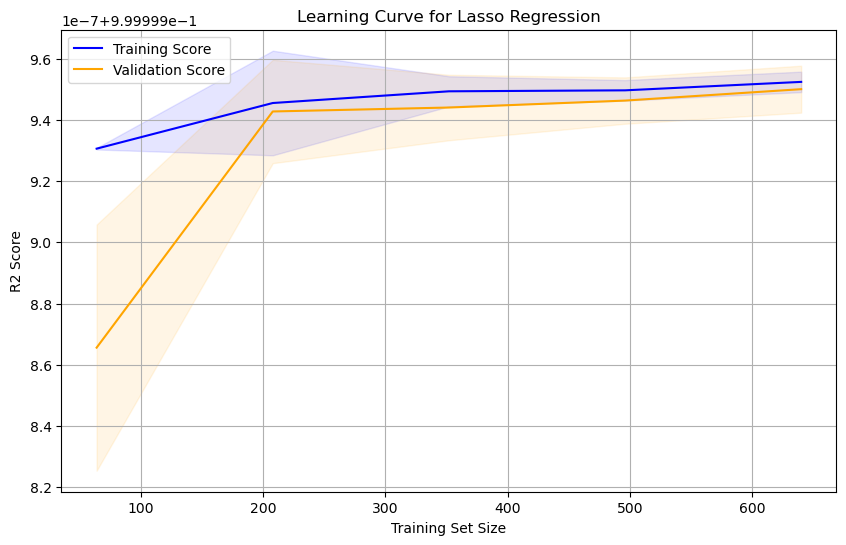

In [139]:
# Compute the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    models["Lasso Regression"], X_train, y_train, cv=5, scoring="r2"
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.plot(train_sizes, val_mean, label="Validation Score", color="orange")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="orange")
plt.title("Learning Curve for Lasso Regression")
plt.xlabel("Training Set Size")
plt.ylabel("R2 Score")
plt.legend()
plt.grid(True)
plt.show()

- ✅ **Good Generalization: The validation score closely follows the training score, meaning Lasso is not overfitting.**
- ✅ **Increasing Training Data Helps: As more data is used, validation performance improves.**
- ✅ **Regularization is Effective: Lasso is likely eliminating irrelevant features, making the model more stable.**

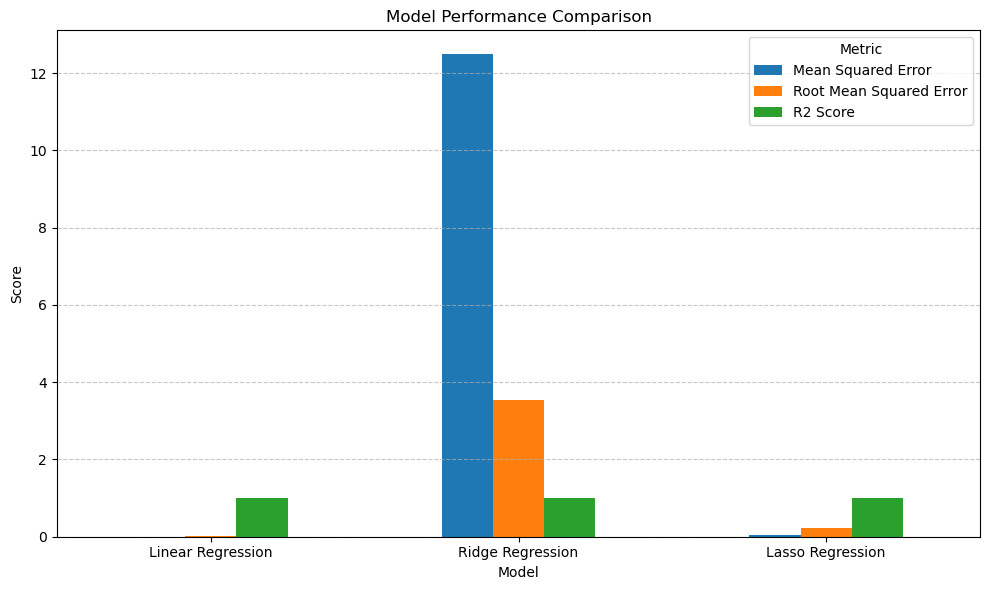

In [134]:
# Ensure "Model" is the index
results_df = results_df.rename_axis("Model")  # Rename index for clarity

# Plot model performance metrics
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=0)  # Ensure model names are readable
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

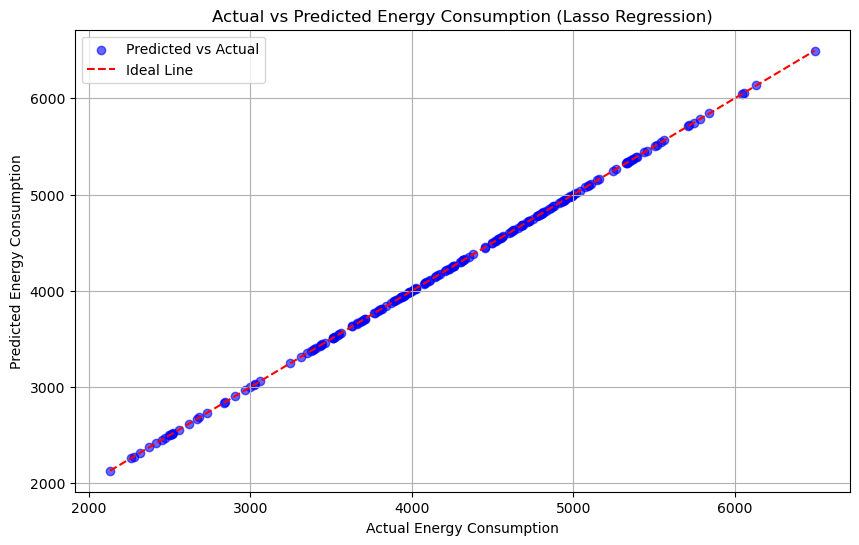

In [137]:
# Define and train the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  # L2 Regularization
    "Lasso Regression": Lasso(alpha=0.01)  # L1 Regularization
}

# Ensure the Linear Regression model is trained
models["Lasso Regression"].fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_ls = models["Lasso Regression"].predict(X_test)

# Scatter plot for Actual vs Predicted Energy Consumption
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ls, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs Predicted Energy Consumption (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [143]:
df_actual_predicted_lr = pd.DataFrame({
    'Actual Energy Consumption': y_test,
    'Predicted Energy Consumption (Ls)': y_pred_ls
})

print(df_actual_predicted_lr.head())


     Actual Energy Consumption  Predicted Energy Consumption (Ls)
521                    4549.59                        4549.709296
737                    2842.91                        2842.988074
740                    5781.83                        5782.185031
660                    4773.54                        4773.573197
411                    3791.04                        3791.212885
